In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../Data"))

import warnings
warnings.filterwarnings("ignore")

import matplotlib
matplotlib.rc('figure', figsize = (20, 8))
matplotlib.rc('font', size = 14)
matplotlib.rc('axes.spines', top = False, right = False)
matplotlib.rc('axes', grid = False)
matplotlib.rc('axes', facecolor = 'white')

['JOB_20knob.csv', 'JOB_197knob.csv', '.DS_Store', 'JOB_5knob.csv']


### JOB Dataset （data preprocessing)

In [2]:
data = pd.read_csv("../Data/JOB_20knob.csv")
data.drop('Unnamed: 0',axis=1,inplace=True)
data.head()

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_stats_method,innodb_stats_persistent,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,...,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
0,8,5,2000,nulls_equal,ON,0,20,16777216,8192,2000,...,6334,2493583,9123,825988,1143758381945588839,88561554,10002,7,19,201.845283
1,123,68,622055,nulls_unequal,ON,578,1483,844247547,30908443,120253,...,1017,5163156,46311,260590,1028820705609499842,368525936,7184,11,30,240.000000
2,423,94,55560,nulls_ignored,OFF,454,1145,603437485,28601378,36125,...,2264,10808153,49292,313544,1555696070363263305,1548053,7280,10,96,240.000000
3,41,5,2000,nulls_equal,ON,0,20,16777216,8192,2000,...,2157,3697217,21052,428026,101389289510156277,256727714,5345,12,93,240.000000
4,180,25,353983,nulls_unequal,ON,851,15687,652695011,70073193,226073,...,5084,9545389,41100,684414,1134415352474036782,86138917,8037,7,47,240.000000


In [3]:
data.columns

Index(['innodb_adaptive_hash_index_parts',
       'innodb_compression_failure_threshold_pct', 'innodb_open_files',
       'innodb_stats_method', 'innodb_stats_persistent',
       'innodb_thread_concurrency', 'max_delayed_threads',
       'max_heap_table_size', 'query_alloc_block_size', 'table_open_cache',
       'innodb_online_alter_log_max_size', 'host_cache_size',
       'read_rnd_buffer_size', 'stored_program_cache',
       'max_length_for_sort_data', 'innodb_max_undo_log_size',
       'innodb_old_blocks_time', 'range_alloc_block_size',
       'innodb_stats_transient_sample_pages', 'innodb_commit_concurrency',
       'lat'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   innodb_adaptive_hash_index_parts          6250 non-null   int64  
 1   innodb_compression_failure_threshold_pct  6250 non-null   int64  
 2   innodb_open_files                         6250 non-null   int64  
 3   innodb_stats_method                       6250 non-null   object 
 4   innodb_stats_persistent                   6250 non-null   object 
 5   innodb_thread_concurrency                 6250 non-null   int64  
 6   max_delayed_threads                       6250 non-null   int64  
 7   max_heap_table_size                       6250 non-null   int64  
 8   query_alloc_block_size                    6250 non-null   int64  
 9   table_open_cache                          6250 non-null   int64  
 10  innodb_online_alter_log_max_size    

In [5]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/6250)*100})
missing_data

,total_missing,perc_missing
innodb_adaptive_hash_index_parts,0,0.0
innodb_compression_failure_threshold_pct,0,0.0
innodb_open_files,0,0.0
innodb_stats_method,0,0.0
innodb_stats_persistent,0,0.0
innodb_thread_concurrency,0,0.0
max_delayed_threads,0,0.0
max_heap_table_size,0,0.0
query_alloc_block_size,0,0.0
table_open_cache,0,0.0


In [6]:
data.describe()

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,innodb_online_alter_log_max_size,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
count,6250.000000,6250.00000,6250.000000,6250.000000,6250.000000,6.250000e+03,6.250000e+03,6250.000000,6.250000e+03,6250.00000,6.250000e+03,6250.00000,6250.000000,6.250000e+03,6.250000e+03,6250.000000,6250.000000,6250.000000,6250.000000
mean,47.465760,42.47520,247816.277280,495.617600,7730.002400,5.783333e+08,6.256344e+07,118162.553440,2.683868e+18,3249.69200,6.940408e+06,26708.64704,421905.272320,9.166090e+17,2.156532e+08,7189.181280,11.476640,49.703360,113.030858
std,111.837597,37.14597,248551.802641,365.629217,5973.891371,3.986040e+08,5.027991e+07,89685.998618,4.529150e+18,1902.62363,3.870639e+06,15118.76458,242361.378904,5.317075e+17,1.225678e+08,1779.268675,2.881816,28.930601,63.755166
min,1.000000,0.00000,10.000000,0.000000,0.000000,1.638400e+04,1.024000e+03,1.000000,6.553600e+04,0.00000,2.399220e+05,249.00000,953.000000,4.583719e+14,1.835800e+04,4096.000000,7.000000,0.000000,50.169253
25%,3.000000,2.00000,19601.250000,156.250000,1634.000000,2.058889e+08,1.169205e+07,35879.250000,5.318201e+17,1571.25000,3.538349e+06,13538.50000,211856.750000,4.540337e+17,1.108558e+08,5638.250000,9.000000,24.000000,70.188341
50%,3.000000,38.00000,140418.000000,484.000000,7285.000000,5.809421e+08,5.727267e+07,110064.500000,1.097020e+18,3234.50000,6.939156e+06,26855.00000,424410.500000,9.176116e+17,2.166086e+08,7197.500000,11.000000,50.000000,85.589287
75%,16.000000,76.00000,474843.000000,856.000000,13442.750000,1.045385e+09,1.146484e+08,202508.000000,1.653255e+18,4951.75000,1.033576e+07,40000.75000,629351.750000,1.379198e+18,3.210921e+08,8746.000000,14.000000,75.000000,117.488338
max,512.000000,100.00000,655350.000000,1000.000000,16384.000000,1.073742e+09,1.342177e+08,250000.000000,1.844670e+19,6544.00000,1.364950e+07,52651.00000,839656.000000,1.843985e+18,4.294961e+08,10239.000000,16.000000,99.000000,240.000000


In [7]:
data['innodb_stats_method'].value_counts()

nulls_equal      3294
nulls_unequal    2527
nulls_ignored     429
Name: innodb_stats_method, dtype: int64

In [8]:
data['innodb_stats_persistent'].value_counts()

OFF    4200
ON     2050
Name: innodb_stats_persistent, dtype: int64

In [9]:
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, Normalizer, StandardScaler, MaxAbsScaler, KBinsDiscretizer, LabelEncoder, OneHotEncoder
from sklearn.linear_model import lasso_path, Lasso
from sklearn.model_selection import train_test_split, ParameterGrid

In [10]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

In [11]:
#label encoding
label_data = data.copy()

#object
label_encoder = LabelEncoder()
for col in object_cols:
    label_data[col] = label_encoder.fit_transform(data[col])

In [12]:
label_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6250 entries, 0 to 6249
Data columns (total 21 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   innodb_adaptive_hash_index_parts          6250 non-null   int64  
 1   innodb_compression_failure_threshold_pct  6250 non-null   int64  
 2   innodb_open_files                         6250 non-null   int64  
 3   innodb_stats_method                       6250 non-null   int64  
 4   innodb_stats_persistent                   6250 non-null   int64  
 5   innodb_thread_concurrency                 6250 non-null   int64  
 6   max_delayed_threads                       6250 non-null   int64  
 7   max_heap_table_size                       6250 non-null   int64  
 8   query_alloc_block_size                    6250 non-null   int64  
 9   table_open_cache                          6250 non-null   int64  
 10  innodb_online_alter_log_max_size    

In [13]:
label_data.head()

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_stats_method,innodb_stats_persistent,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,...,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
0,8,5,2000,0,1,0,20,16777216,8192,2000,...,6334,2493583,9123,825988,1143758381945588839,88561554,10002,7,19,201.845283
1,123,68,622055,2,1,578,1483,844247547,30908443,120253,...,1017,5163156,46311,260590,1028820705609499842,368525936,7184,11,30,240.000000
2,423,94,55560,1,0,454,1145,603437485,28601378,36125,...,2264,10808153,49292,313544,1555696070363263305,1548053,7280,10,96,240.000000
3,41,5,2000,0,1,0,20,16777216,8192,2000,...,2157,3697217,21052,428026,101389289510156277,256727714,5345,12,93,240.000000
4,180,25,353983,2,1,851,15687,652695011,70073193,226073,...,5084,9545389,41100,684414,1134415352474036782,86138917,8037,7,47,240.000000


### StandardScaler

In [14]:
Standar_scaler = StandardScaler()
df_Standar_scaler = Standar_scaler.fit_transform(label_data)
df_Standar_scaler = pd.DataFrame(df_Standar_scaler, columns=data.columns)

In [15]:
df_Standar_scaler

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_stats_method,innodb_stats_persistent,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,...,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
0,-0.352913,-1.008944,-0.989073,-0.916472,1.431356,-1.355628,-1.290720,-1.408920,-1.244240,-1.295318,...,1.621211,-1.148953,-1.163260,1.667407,0.427241,-1.036991,1.581011,-1.553534,-1.061361,1.393166
1,0.675446,0.687204,1.505797,1.172878,1.431356,0.225335,-1.045801,0.667167,-0.629626,0.023310,...,-1.173575,-0.459199,1.296662,-0.665651,0.211057,1.247350,-0.002912,-0.165409,-0.681111,1.991671
2,3.358122,1.387201,-0.773568,0.128203,-0.698638,-0.113834,-1.102385,0.062985,-0.675514,-0.914793,...,-0.518111,0.999332,1.493850,-0.447142,1.202048,-1.746970,0.051047,-0.512440,1.600393,1.991671
3,-0.057818,-1.008944,-0.989073,-0.916472,1.431356,-1.355628,-1.290720,-1.408920,-1.244240,-1.295318,...,-0.574354,-0.837963,-0.374177,0.025257,-1.533333,0.335144,-1.036566,0.181622,1.496689,1.991671
4,1.185155,-0.470484,0.427175,1.172878,1.431356,0.972053,1.332069,0.186570,0.149371,1.203299,...,0.964171,0.673064,0.951963,1.083216,0.409668,-1.056759,0.476537,-1.553534,-0.093450,1.991671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,-0.272433,-1.089713,-0.503864,-0.916472,1.431356,-0.097422,-0.804063,0.414638,-0.637841,-0.036481,...,0.240901,0.395067,1.195190,-1.045099,1.392825,1.371577,-0.015278,1.222716,-1.095929,0.566193
6246,-0.335028,-0.551253,-0.830703,-0.916472,-0.698638,-0.329917,-0.504235,0.192263,-0.350952,1.427466,...,0.113698,-0.295745,0.585105,0.320814,0.193345,-0.301159,-0.146241,-1.206503,-1.303339,-0.575334
6247,-0.397624,-0.362792,-0.189522,1.172878,-0.698638,0.564503,-0.185991,0.859557,-0.833350,1.368065,...,1.199129,0.856426,1.406335,-0.874625,0.261031,-1.456826,0.226976,-1.553534,-0.058882,-0.792488
6248,-0.406566,-0.632022,0.060748,-0.916472,-0.698638,0.430477,-0.989552,-0.743118,-0.732433,1.431447,...,1.408856,1.079552,-1.342257,0.717237,-0.755545,0.314610,-0.513275,1.222716,-0.819383,1.045996


In [16]:
y = df_Standar_scaler['lat']
X = df_Standar_scaler.drop('lat', axis=1)
X_train, X.test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [17]:
X.shape

(6250, 20)

In [18]:
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = Lasso()
coefs_lasso = []

In [19]:
for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X_train, y_train)
    coefs_lasso.append(lasso.coef_)

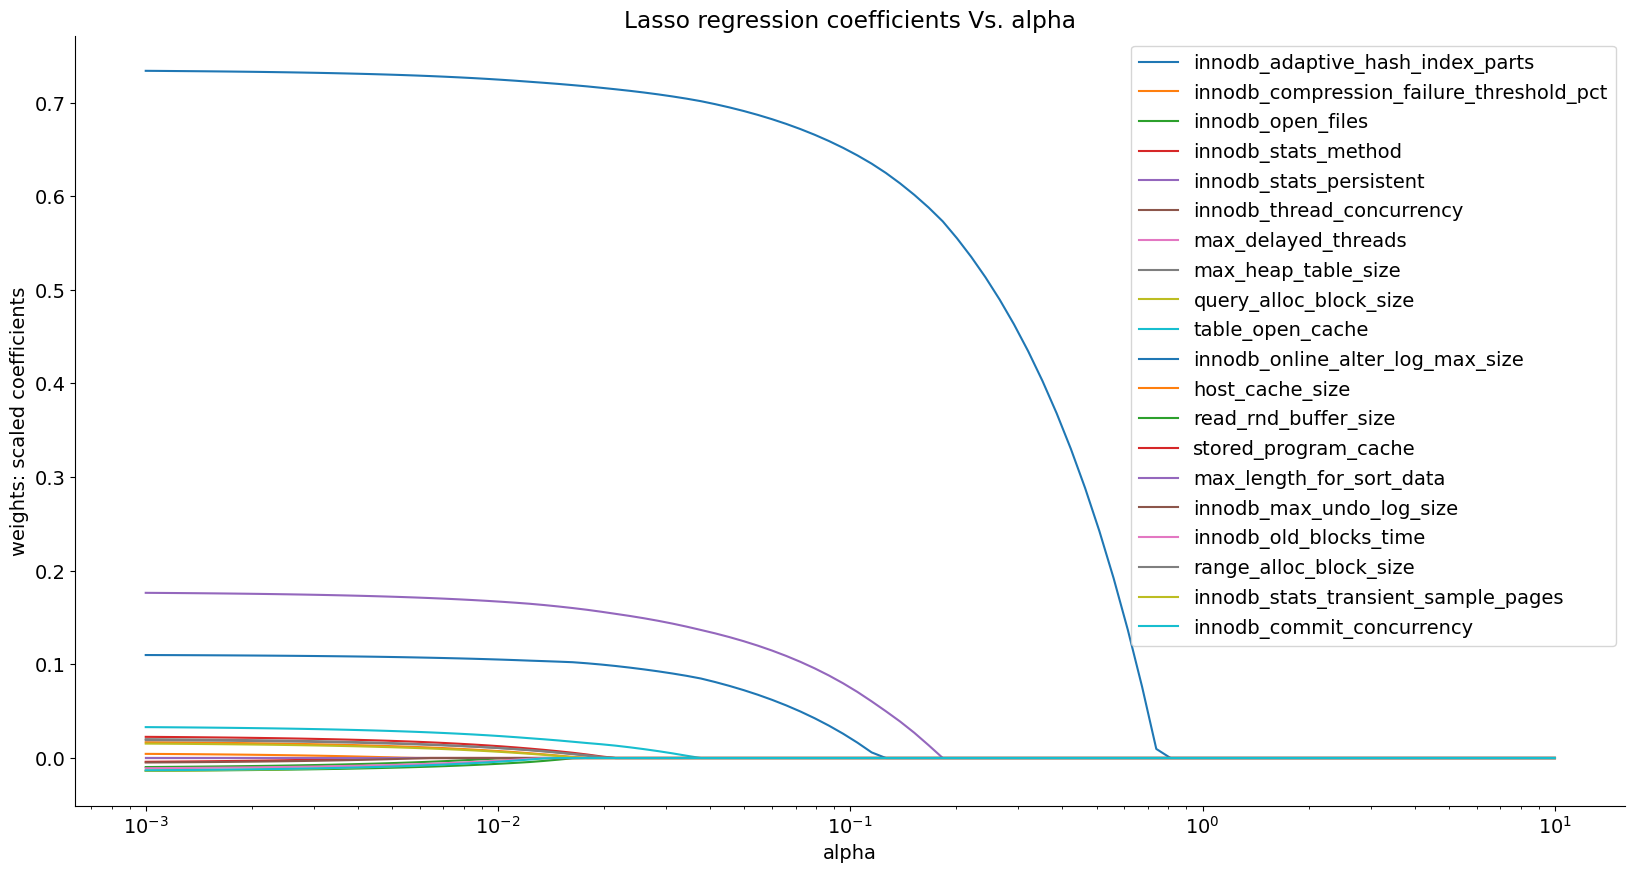

In [20]:
plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
#plt.axes('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(label_data.drop('lat', axis=1, inplace=False).columns)
plt.show()

In [21]:
coefs_lasso

[array([ 0.73385819,  0.01681863, -0.01368473,  0.02260626,  0.17639734,
        -0.        , -0.        ,  0.01908003, -0.0136311 ,  0.0329884 ,
         0.10996938,  0.00442307, -0.00964324, -0.00402485,  0.        ,
        -0.00480307, -0.01089247,  0.02015332,  0.015381  , -0.01311141]),
 array([ 0.73375777,  0.01671686, -0.01360488,  0.02250088,  0.17629636,
        -0.        , -0.        ,  0.01898874, -0.01351599,  0.03288674,
         0.10991808,  0.00433099, -0.00954065, -0.00391604,  0.        ,
        -0.00471443, -0.01080626,  0.02005064,  0.01528647, -0.01301264]),
 array([ 0.73363386,  0.01661702, -0.0135039 ,  0.02238713,  0.17618661,
        -0.        , -0.        ,  0.01887691, -0.01339702,  0.03277874,
         0.10986799,  0.00422988, -0.00942789, -0.00379647,  0.        ,
        -0.00461746, -0.01071198,  0.01993794,  0.01518292, -0.01290398]),
 array([ 0.73351327,  0.01649431, -0.01340848,  0.0222601 ,  0.17606506,
        -0.        , -0.        ,  0.01876721

In [22]:
lasso = Lasso(alpha=10**(-3))
model_lasso = lasso.fit(X_train, y_train)
coef = pd.Series(model_lasso.coef_,index=X_train.columns)
print(coef[coef != 0].abs().sort_values(ascending = False))

innodb_adaptive_hash_index_parts            0.733858
innodb_stats_persistent                     0.176397
innodb_online_alter_log_max_size            0.109969
table_open_cache                            0.032988
innodb_stats_method                         0.022606
range_alloc_block_size                      0.020153
max_heap_table_size                         0.019080
innodb_compression_failure_threshold_pct    0.016819
innodb_stats_transient_sample_pages         0.015381
innodb_open_files                           0.013685
query_alloc_block_size                      0.013631
innodb_commit_concurrency                   0.013111
innodb_old_blocks_time                      0.010892
read_rnd_buffer_size                        0.009643
innodb_max_undo_log_size                    0.004803
host_cache_size                             0.004423
stored_program_cache                        0.004025
dtype: float64


### MinMaxScaler

In [23]:
MinMax_scaler =MinMaxScaler()
df_MinMax_scaler = MinMax_scaler.fit_transform(label_data)
df_MinMax_scaler = pd.DataFrame(df_Standar_scaler, columns=data.columns)

In [24]:
df_MinMax_scaler

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_stats_method,innodb_stats_persistent,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,...,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
0,-0.352913,-1.008944,-0.989073,-0.916472,1.431356,-1.355628,-1.290720,-1.408920,-1.244240,-1.295318,...,1.621211,-1.148953,-1.163260,1.667407,0.427241,-1.036991,1.581011,-1.553534,-1.061361,1.393166
1,0.675446,0.687204,1.505797,1.172878,1.431356,0.225335,-1.045801,0.667167,-0.629626,0.023310,...,-1.173575,-0.459199,1.296662,-0.665651,0.211057,1.247350,-0.002912,-0.165409,-0.681111,1.991671
2,3.358122,1.387201,-0.773568,0.128203,-0.698638,-0.113834,-1.102385,0.062985,-0.675514,-0.914793,...,-0.518111,0.999332,1.493850,-0.447142,1.202048,-1.746970,0.051047,-0.512440,1.600393,1.991671
3,-0.057818,-1.008944,-0.989073,-0.916472,1.431356,-1.355628,-1.290720,-1.408920,-1.244240,-1.295318,...,-0.574354,-0.837963,-0.374177,0.025257,-1.533333,0.335144,-1.036566,0.181622,1.496689,1.991671
4,1.185155,-0.470484,0.427175,1.172878,1.431356,0.972053,1.332069,0.186570,0.149371,1.203299,...,0.964171,0.673064,0.951963,1.083216,0.409668,-1.056759,0.476537,-1.553534,-0.093450,1.991671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,-0.272433,-1.089713,-0.503864,-0.916472,1.431356,-0.097422,-0.804063,0.414638,-0.637841,-0.036481,...,0.240901,0.395067,1.195190,-1.045099,1.392825,1.371577,-0.015278,1.222716,-1.095929,0.566193
6246,-0.335028,-0.551253,-0.830703,-0.916472,-0.698638,-0.329917,-0.504235,0.192263,-0.350952,1.427466,...,0.113698,-0.295745,0.585105,0.320814,0.193345,-0.301159,-0.146241,-1.206503,-1.303339,-0.575334
6247,-0.397624,-0.362792,-0.189522,1.172878,-0.698638,0.564503,-0.185991,0.859557,-0.833350,1.368065,...,1.199129,0.856426,1.406335,-0.874625,0.261031,-1.456826,0.226976,-1.553534,-0.058882,-0.792488
6248,-0.406566,-0.632022,0.060748,-0.916472,-0.698638,0.430477,-0.989552,-0.743118,-0.732433,1.431447,...,1.408856,1.079552,-1.342257,0.717237,-0.755545,0.314610,-0.513275,1.222716,-0.819383,1.045996


In [25]:
y1 = df_MinMax_scaler['lat']
X1 = df_MinMax_scaler.drop('lat', axis=1)
X1_train, X1.test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2)

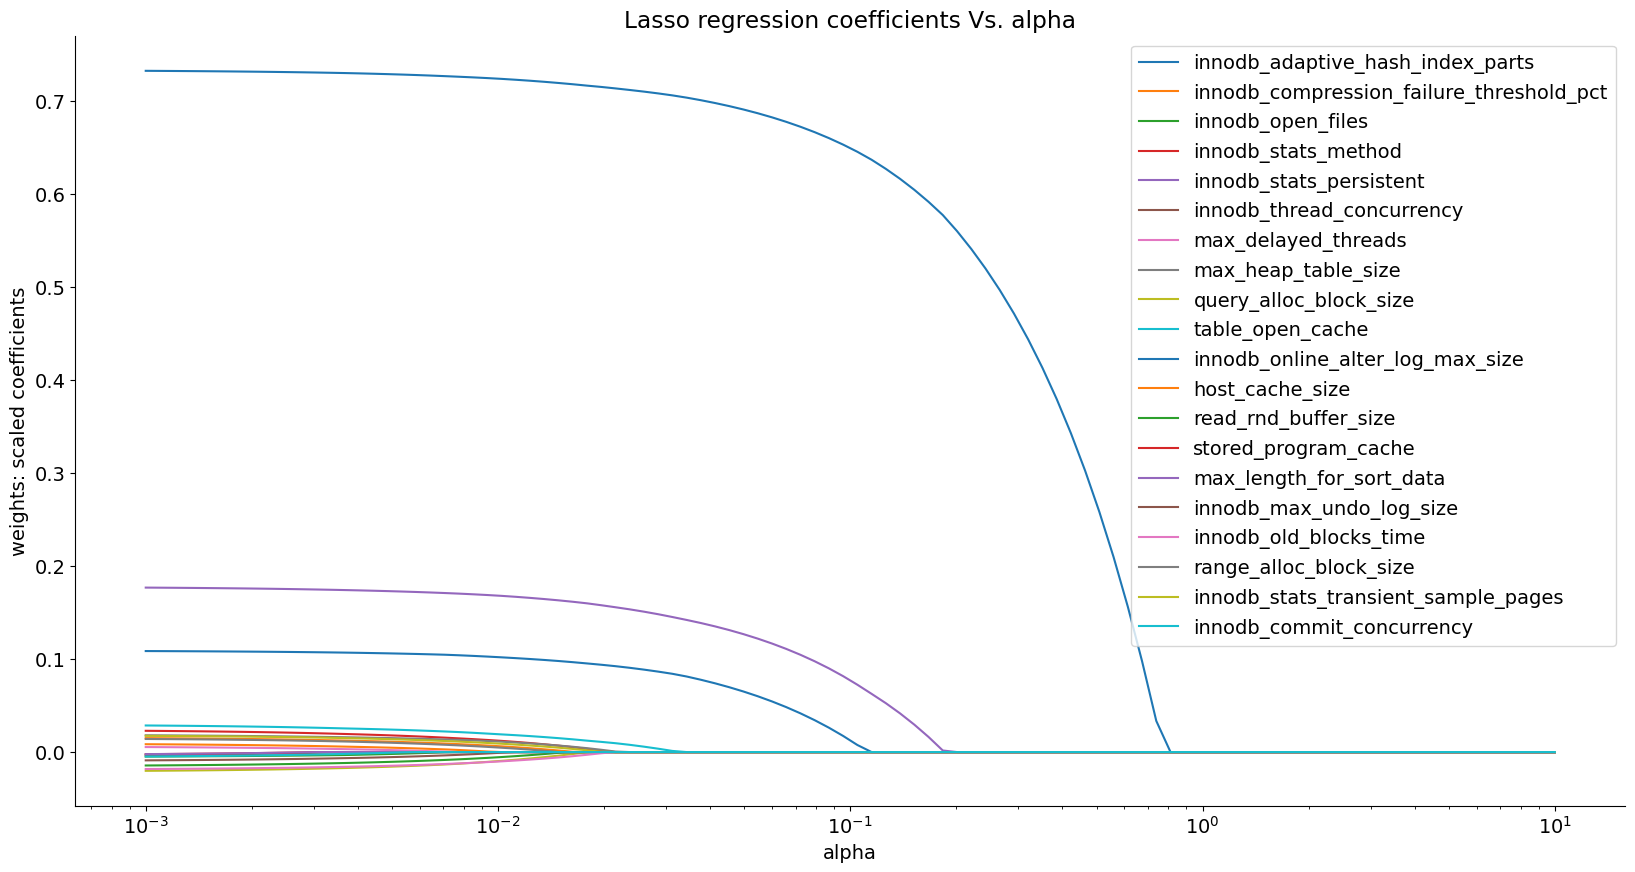

In [26]:
alpha_lasso = 10**np.linspace(-3,1,100)
lasso = Lasso()
coefs_lasso1 = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X1_train, y1_train)
    coefs_lasso1.append(lasso.coef_)

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso1)
ax.set_xscale('log')
#plt.axes('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(label_data.drop('lat', axis=1, inplace=False).columns)
plt.show()

In [27]:
lasso = Lasso(alpha=10**(-3))
model_lasso = lasso.fit(X1_train, y1_train)
coef1 = pd.Series(model_lasso.coef_,index=X1_train.columns)
print(coef1[coef1 != 0].abs().sort_values(ascending = False))

innodb_adaptive_hash_index_parts            0.732990
innodb_stats_persistent                     0.176962
innodb_online_alter_log_max_size            0.108684
table_open_cache                            0.028615
innodb_stats_method                         0.022880
query_alloc_block_size                      0.020178
innodb_old_blocks_time                      0.018223
max_heap_table_size                         0.018049
innodb_stats_transient_sample_pages         0.017471
host_cache_size                             0.014992
read_rnd_buffer_size                        0.014430
range_alloc_block_size                      0.014086
innodb_max_undo_log_size                    0.008918
innodb_compression_failure_threshold_pct    0.008443
max_delayed_threads                         0.005391
innodb_open_files                           0.004834
innodb_commit_concurrency                   0.004739
innodb_thread_concurrency                   0.003277
stored_program_cache                        0.

### MaxAbsScaler

In [28]:
Abs_scaler =MaxAbsScaler()
df_Abs_scaler = Abs_scaler.fit_transform(label_data)
df_Abs_scaler = pd.DataFrame(df_Abs_scaler, columns=data.columns)

In [29]:
df_Abs_scaler

,innodb_adaptive_hash_index_parts,innodb_compression_failure_threshold_pct,innodb_open_files,innodb_stats_method,innodb_stats_persistent,innodb_thread_concurrency,max_delayed_threads,max_heap_table_size,query_alloc_block_size,table_open_cache,...,host_cache_size,read_rnd_buffer_size,stored_program_cache,max_length_for_sort_data,innodb_max_undo_log_size,innodb_old_blocks_time,range_alloc_block_size,innodb_stats_transient_sample_pages,innodb_commit_concurrency,lat
0,0.015625,0.05,0.003052,0.0,1.0,0.000,0.001221,0.015625,0.000061,0.008000,...,0.967910,0.182687,0.173273,0.983722,0.620265,0.206199,0.976853,0.4375,0.191919,0.841022
1,0.240234,0.68,0.949195,1.0,1.0,0.578,0.090515,0.786267,0.230286,0.481012,...,0.155410,0.378267,0.879584,0.310353,0.557933,0.858043,0.701631,0.6875,0.303030,1.000000
2,0.826172,0.94,0.084779,0.5,0.0,0.454,0.069885,0.561995,0.213097,0.144500,...,0.345966,0.791835,0.936203,0.373420,0.843660,0.003604,0.711007,0.6250,0.969697,1.000000
3,0.080078,0.05,0.003052,0.0,1.0,0.000,0.001221,0.015625,0.000061,0.008000,...,0.329615,0.270868,0.399840,0.509764,0.054984,0.597742,0.522024,0.7500,0.939394,1.000000
4,0.351562,0.25,0.540143,1.0,1.0,0.851,0.957458,0.607870,0.522086,0.904292,...,0.776895,0.699321,0.780612,0.815112,0.615198,0.200558,0.784940,0.4375,0.474747,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6245,0.033203,0.02,0.187060,0.0,1.0,0.460,0.178650,0.692528,0.227209,0.459564,...,0.566626,0.620495,0.850449,0.200837,0.898666,0.893491,0.699482,0.9375,0.181818,0.621357
6246,0.019531,0.22,0.063111,0.0,0.0,0.375,0.287964,0.609983,0.334673,0.984704,...,0.529645,0.424615,0.675277,0.595068,0.552827,0.416171,0.676726,0.5000,0.121212,0.318139
6247,0.005859,0.29,0.306270,1.0,0.0,0.702,0.403992,0.857682,0.153974,0.963396,...,0.845202,0.751314,0.911075,0.250039,0.572342,0.086398,0.741576,0.4375,0.484848,0.260457
6248,0.003906,0.19,0.401181,0.0,0.0,0.653,0.111023,0.262770,0.191776,0.986132,...,0.906174,0.814581,0.121878,0.709483,0.279239,0.591882,0.612950,0.9375,0.262626,0.748805


In [30]:
y2 = df_Abs_scaler['lat']
X2 = df_Abs_scaler.drop('lat', axis=1)
X2_train, X2.test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)

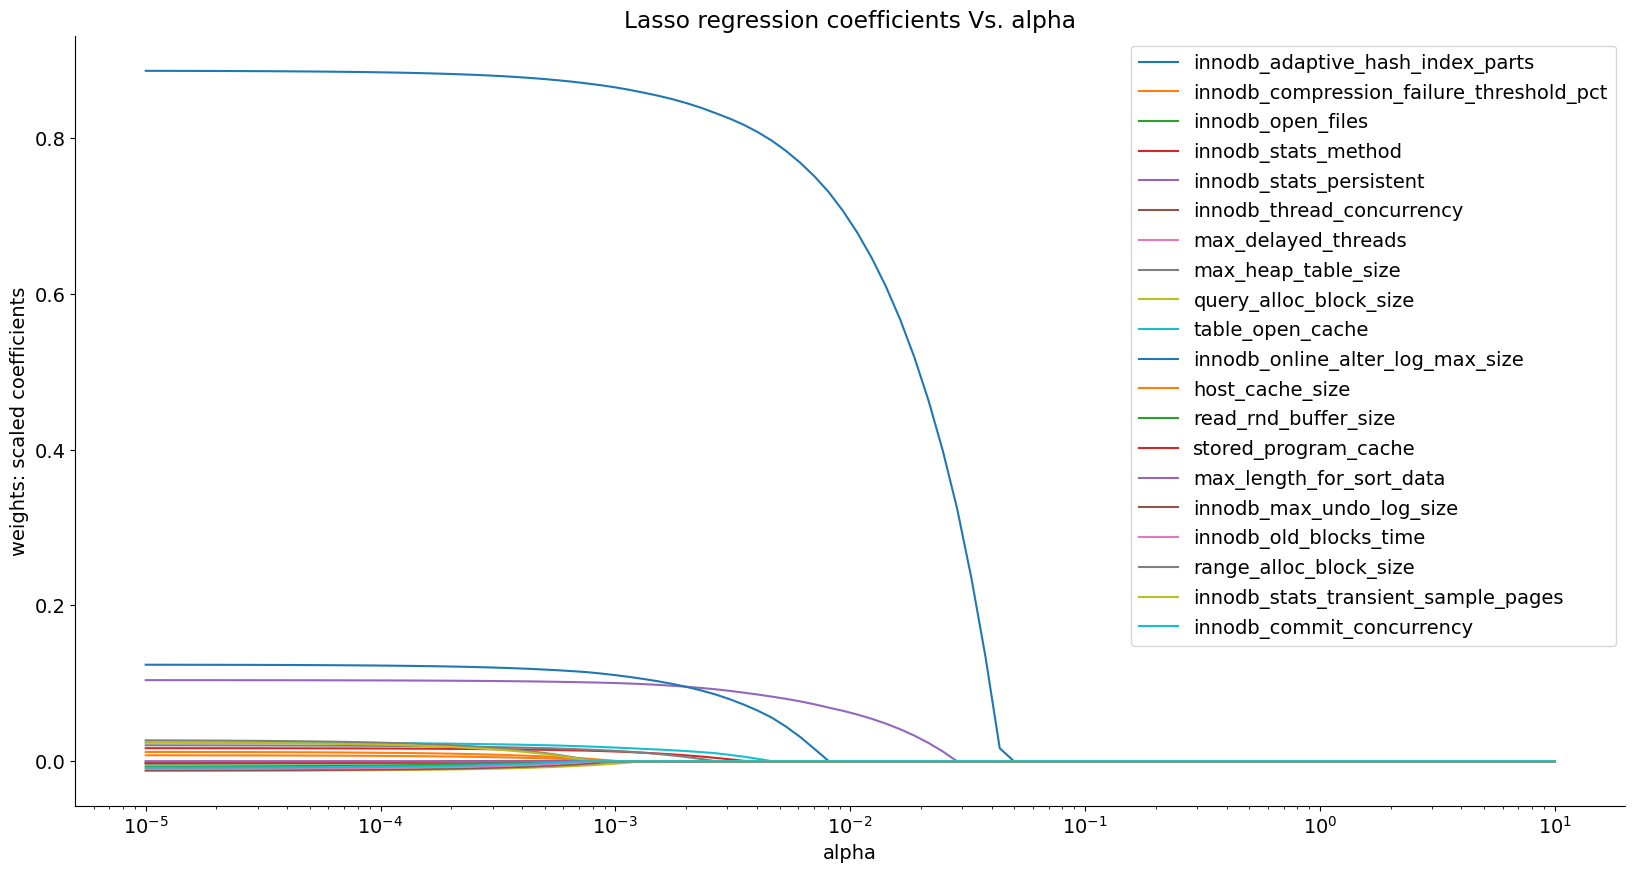

In [33]:
alpha_lasso = 10**np.linspace(-5,1,100)
lasso = Lasso()
coefs_lasso2 = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(X2_train, y2_train)
    coefs_lasso2.append(lasso.coef_)

plt.figure(figsize=(20,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso2)
ax.set_xscale('log')
#plt.axes('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(label_data.drop('lat', axis=1, inplace=False).columns)
plt.show()

In [34]:
lasso = Lasso(alpha=10**(-5))
model_lasso = lasso.fit(X2_train, y2_train)
coef2 = pd.Series(model_lasso.coef_,index=X2_train.columns)
print(coef2[coef2 != 0].abs().sort_values(ascending = False))

innodb_adaptive_hash_index_parts            0.886518
innodb_online_alter_log_max_size            0.123918
innodb_stats_persistent                     0.104127
range_alloc_block_size                      0.026811
table_open_cache                            0.024050
innodb_stats_transient_sample_pages         0.024038
max_heap_table_size                         0.020453
innodb_stats_method                         0.016721
query_alloc_block_size                      0.012319
host_cache_size                             0.011928
innodb_max_undo_log_size                    0.011772
innodb_old_blocks_time                      0.009686
innodb_commit_concurrency                   0.008164
innodb_compression_failure_threshold_pct    0.007634
read_rnd_buffer_size                        0.006669
innodb_open_files                           0.003109
stored_program_cache                        0.002516
innodb_thread_concurrency                   0.002080
max_delayed_threads                         0.

In [125]:
co1 = pd.DataFrame(coefs_lasso)
knob_name = label_data.drop('lat', axis=1).columns
co1.columns = knob_name
knob_count = np.count_nonzero(co1, axis=0)
knob_count_df = pd.DataFrame(knob_count, index=knob_name, columns= ['count'])
knob_count_df.sort_values('count', ascending= False)

,count
innodb_adaptive_hash_index_parts,72
innodb_stats_persistent,56
innodb_online_alter_log_max_size,52
table_open_cache,39
innodb_stats_method,33
range_alloc_block_size,33
max_heap_table_size,33
innodb_compression_failure_threshold_pct,31
innodb_stats_transient_sample_pages,31
innodb_open_files,31


In [126]:
co2 = pd.DataFrame(coefs_lasso1)
knob_name = label_data.drop('lat', axis=1).columns
co2.columns = knob_name
knob_count1 = np.count_nonzero(co2, axis=0)
knob_count1_df = pd.DataFrame(knob_count1, index=knob_name, columns= ['count'])
knob_count1_df.sort_values('count', ascending= False)

,count
innodb_adaptive_hash_index_parts,72
innodb_stats_persistent,57
innodb_online_alter_log_max_size,51
table_open_cache,38
max_heap_table_size,34
innodb_stats_method,33
innodb_stats_transient_sample_pages,33
innodb_old_blocks_time,33
query_alloc_block_size,32
host_cache_size,31


In [127]:
co3 = pd.DataFrame(coefs_lasso2)
knob_name = label_data.drop('lat', axis=1).columns
co3.columns = knob_name
knob_count2 = np.count_nonzero(co3, axis=0)
knob_count2_df = pd.DataFrame(knob_count2, index=knob_name, columns= ['count'])
knob_count2_df.sort_values('count', ascending= False)


,count
innodb_adaptive_hash_index_parts,61
innodb_stats_persistent,58
innodb_online_alter_log_max_size,48
table_open_cache,44
innodb_stats_method,43
max_heap_table_size,41
query_alloc_block_size,35
innodb_max_undo_log_size,34
host_cache_size,34
innodb_compression_failure_threshold_pct,33
